# 0. Load dataset

In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
from utils.stats_utils import OLS_model, GLM_model


In [2]:
df = pd.read_csv('data/cleaned_data_by_clustering_fill.csv', delimiter=",")
df.drop(['Component1', 'Component2', 'Component3', 'Component4', 'k-means cluster'], axis=1, inplace=True)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
1,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,wed,...,1,999,1,failure,-0.2,92.756,-45.9,3.743,5176.3,no
2,41,technician,divorced,professional.course,no,no,yes,cellular,dec,thu,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
3,37,admin.,married,high.school,no,yes,no,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no
4,48,admin.,married,high.school,no,yes,yes,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no


# 1. Standardlize Numeric data

In [4]:
df_numeric = df[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
df_numeric

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,31,1,999,0,-0.2,92.756,-45.9,3.816,5176.3
1,39,1,999,1,-0.2,92.756,-45.9,3.743,5176.3
2,41,1,999,0,-0.2,92.756,-45.9,3.669,5176.3
3,37,1,999,0,-0.2,92.756,-45.9,3.563,5176.3
4,48,1,999,0,-0.2,92.756,-45.9,3.563,5176.3
...,...,...,...,...,...,...,...,...,...
41183,54,2,10,1,-1.1,94.767,-50.8,1.035,4963.6
41184,40,2,999,4,-1.1,94.767,-50.8,1.030,4963.6
41185,62,1,1,6,-1.1,94.767,-50.8,1.031,4963.6
41186,62,2,6,3,-1.1,94.767,-50.8,1.031,4963.6


In [5]:
ss = StandardScaler()
df_numeric_scaled = pd.DataFrame(ss.fit_transform(df_numeric),columns = df_numeric.columns)

In [6]:
df_numeric_scaled.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.865939,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,0.112261,0.128222
1,-0.098268,-0.565922,0.195414,1.671136,-0.179437,-1.416064,-1.166213,0.070173,0.128222
2,0.093650,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,0.027507,0.128222
3,-0.290186,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,-0.033608,0.128222
4,0.765363,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,-0.033608,0.128222


# 2. Transform categorical data

In [7]:
job = pd.get_dummies(df['job'], drop_first=True)
job = job.add_prefix("job_")
marital = pd.get_dummies(df['marital'], drop_first=True)
marital = marital.add_prefix("marital_")
education = pd.get_dummies(df['education'], drop_first=True)
education = education.add_prefix("education_")
default = pd.get_dummies(df['default'], drop_first=True)
default = default.add_prefix("default_")
housing = pd.get_dummies(df['housing'], drop_first=True)
housing = housing.add_prefix("housing_")
loan = pd.get_dummies(df['loan'], drop_first=True)
loan = loan.add_prefix("loan_")
contact = pd.get_dummies(df['contact'], drop_first=True)
contact = contact.add_prefix("contact_")
month = pd.get_dummies(df['month'], drop_first=True)
month = month.add_prefix("month_")
day_of_week = pd.get_dummies(df['day_of_week'], drop_first=True)
day_of_week = day_of_week.add_prefix("day_of_week_")
poutcome = pd.get_dummies(df['poutcome'], drop_first=True)
poutcome = poutcome.add_prefix("poutcome_")
y = pd.get_dummies(df['y'], drop_first=True)
y = y.add_prefix("y_")

df_categorical = pd.concat([job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y], axis=1)


In [8]:
df_categorical.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 3. Do the first predictive analysis

In [9]:
df1 = pd.concat([df_numeric_scaled, df_categorical], axis=1)
df1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,-0.865939,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,0.112261,0.128222,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.098268,-0.565922,0.195414,1.671136,-0.179437,-1.416064,-1.166213,0.070173,0.128222,0,...,0,0,0,0,0,0,1,0,0,0
2,0.093650,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,0.027507,0.128222,0,...,0,0,0,0,1,0,0,1,0,0
3,-0.290186,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,-0.033608,0.128222,0,...,0,0,0,0,0,0,0,1,0,0
4,0.765363,-0.565922,0.195414,-0.349494,-0.179437,-1.416064,-1.166213,-0.033608,0.128222,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,2.922247e-15,1.409807e-14,9.833535e-14,5.328108e-14,-1.034941e-14,-1.529985e-13,-8.730664e-15,1.784085e-14,4.437677e-14,0.224677,...,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335,0.112654
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.417375,...,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512,0.316173
min,-2.209365e+00,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699804e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.942267e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.694038e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.563310e+00,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X = df1.drop(["y_yes", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], axis=1)
y = df1['y_yes']
summary1 = OLS_model(X, y)

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     200.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:32:05   Log-Likelihood:                -7262.4
No. Observations:               41188   AIC:                         1.461e+04
Df Residuals:                   41146   BIC:                         1.497e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [12]:
summary2 = GLM_model(X, y)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                41188
Model:                            GLM   Df Residuals:                    41146
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12107.
Date:                Mon, 12 Sep 2022   Deviance:                       24214.
Time:                        12:32:06   Pearson chi2:                 4.15e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1097
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Calculate the mean abs coef for each categorical data to determine the most influential factors

In [13]:
results_as_html = summary2.tables[1].as_html()
df_summary2 = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [14]:
from pprint import pprint
category_avg_coef_res = []
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    regex = category + ".*"
    avg_coef = df_summary2[df_summary2.index.str.match(regex)]["coef"].abs().mean()
    category_avg_coef_res.append((category, avg_coef))

category_avg_coef_res.sort(key = lambda x: -x[1])
pprint(category_avg_coef_res)

[('default', 19.2838),
 ('contact', 0.9891),
 ('month', 0.7474444444444446),
 ('poutcome', 0.5489999999999999),
 ('education', 0.25283333333333335),
 ('job', 0.22967000000000004),
 ('marital', 0.13295),
 ('day_of_week', 0.09965000000000002),
 ('loan', 0.0432),
 ('housing', 0.0172)]


In [15]:
import sklearn.metrics as metrics

clf = LR(random_state=0).fit(X, y)
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


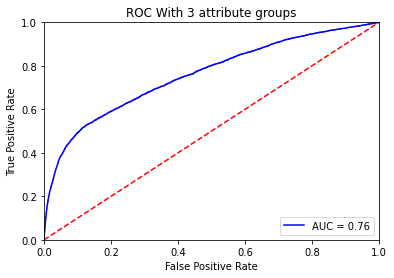

In [16]:
plt.title('ROC With 3 attribute groups')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X)
accuracy_score(y, preds)

0.8973244634359522

# 4. Add the ecnomic variables

In [22]:
# "cons.price.idx", "euribor3m", "nr.employed"
df2 = pd.concat([df_numeric_scaled, df_categorical], axis=1)
X = df1.drop(["y_yes",], axis=1)
y = df1['y_yes']
summary3 = GLM_model(X, y)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                41188
Model:                            GLM   Df Residuals:                    41141
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11366.
Date:                Mon, 12 Sep 2022   Deviance:                       22732.
Time:                        12:38:23   Pearson chi2:                 4.15e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1411
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [23]:
clf = LR(random_state=0).fit(X, y)
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


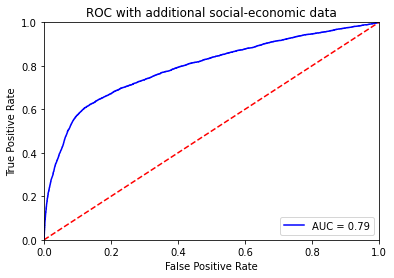

In [24]:
plt.title('ROC with additional social-economic data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
preds = clf.predict(X)
accuracy_score(y, preds)

0.9001650966300865

In [27]:
probs = clf.predict_proba(X)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_blue-collar                41188 non-null  uint8  
 10  job_entrepreneur               41188 non-null  uint8  
 11  job_housemaid                  41188 non-null  uint8  
 12  job_management                 41188 non-null 

# 5. Compare the probability of being successful between targeting groups

## 5.1 student vs. non-student

In [41]:
df_student = X[X["job_student"] == 1]

In [43]:
df_non_student = X[X["job_student"] == 0]

In [44]:
from utils.func_utils import get_avg_prob

In [45]:
get_avg_prob(clf, df_student)

0.31410043808031496

In [46]:
get_avg_prob(clf, df_non_student)

0.1082921608581532

## 5.2 retired vs. non-retired

In [47]:
df_retired = X[X["job_retired"] == 1]
df_non_retired = X[X["job_retired"] == 0]


In [48]:
get_avg_prob(clf, df_retired)

0.25240273639723215

In [49]:
get_avg_prob(clf, df_non_retired)

0.10657461886570807

## 5.3 March vs. non-march

In [50]:
df_march = X[X["month_mar"] == 1]
df_non_march = X[X["month_mar"] == 0]

In [51]:
get_avg_prob(clf, df_march)

0.5035219164404943

In [52]:
get_avg_prob(clf, df_non_march)

0.10741343431963231

## 5.4 job being student or retired, and March, vs. the rest

In [57]:
df_best = X[((X["job_retired"] == 1) | (X["job_student"] == 1)) & (X["month_mar"] == 1)]

In [58]:
get_avg_prob(clf, df_best)

0.5451372949221013

In [60]:
df_non_best = X[((X["job_retired"] == 0) & (X["job_student"] == 0)) | (X["month_mar"] == 0)]

In [61]:
get_avg_prob(clf, df_non_best)

0.11155904748991517